# Regression and Other Stories: Fake midterm and final exam

Fake dataset of 1000 students’ scores on a midterm and final exam. See Chapter 6 in Regression and Other Stories.

-----

### Load packages

In [1]:
using Turing, MCMCChains, Distributions, StatsPlots, Random

### Simulate fake data

In [2]:
n = 1000
# set the random seed to get reproducible results
# change the seed to experiment with variation due to random noise
Random.seed!(2243)
true_ability = rand(Normal(50, 10), n)
noise_1 = rand(Normal(0, 10), n)
noise_2 = rand(Normal(0, 10), n)
midterm = true_ability + noise_1
final = true_ability + noise_2;

### Linear regression

In [3]:
@model function linear_reg(m, f)
    
    σ ~ Truncated(Normal(0,100), 0, Inf)
    
    α ~ Normal(0,100)
    β ~ Normal(0,10)
    
    μ = α .+ m * β
    f ~ MvNormal(μ, σ)
end;

In [4]:
model_1 = linear_reg(midterm, final)
fit_1 = sample(model_1, NUTS(), 4000)
summarystats(fit_1)

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\tburch\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\tburch\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\tburch\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\tburch\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat    ⋯
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64    ⋯

           α   26.3789    1.4438     0.0228    0.0307   2127.3211    0.9999    ⋯
           β    0.4756    0.0277     0.0004    0.0006   2179.2346    1.0000    ⋯
           σ   12.1131    0.2722     0.0043    0.0049   2085.7686    1.0003    ⋯
                                                                1 column omitted


### Plot midterm and final exam scores

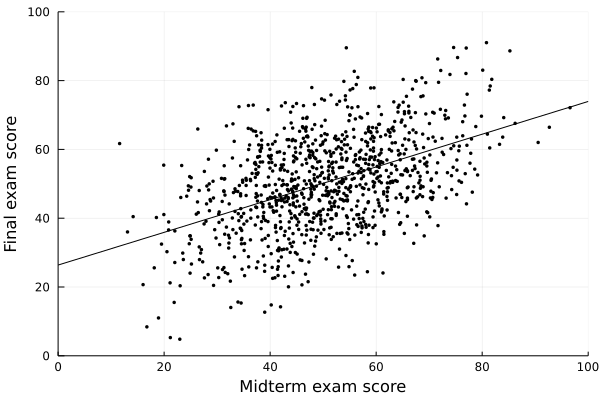

In [5]:
scatter(
    midterm,
    final,
    xlabel="Midterm exam score",
    ylabel="Final exam score",
    color=:black,
    xlim=(0,100),
    ylim=(0,100),
    markersize=2,
    legend=false
)
coefs = get(fit_1, [:α, :β])
a_hat = mean(coefs.α)
b_hat = mean(coefs.β)

plot!(
    0:100,
    x -> a_hat + b_hat * x,
    color=:black
)